In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime 

# 1.Data Collection

In [4]:
now = datetime.now()

ticker = 'INFY'
end = now
start = datetime(now.year-10, now.month, now.day)
df = yf.download(ticker, start, end, auto_adjust=False)
df

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,INFY,INFY,INFY,INFY,INFY,INFY
Date,,,,,,
2015-08-03,6.514524,8.480000,8.565000,8.430000,8.500000,6708600
2015-08-04,6.506843,8.470000,8.485000,8.345000,8.395000,5603000
2015-08-05,6.679693,8.695000,8.775000,8.625000,8.625000,8204200
2015-08-06,6.648963,8.655000,8.725000,8.575000,8.675000,6208400
2015-08-07,6.733468,8.765000,8.770000,8.655000,8.655000,6726600
...,...,...,...,...,...,...
2025-07-28,17.160000,17.160000,17.340000,17.059999,17.320000,21715200
2025-07-29,17.209999,17.209999,17.290001,17.110001,17.280001,11563700


# 2. Data Exploration & Visualization

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.shape

(2515, 6)

In [7]:
df.isna().sum()

Price      Ticker
Adj Close  INFY      0
Close      INFY      0
High       INFY      0
Low        INFY      0
Open       INFY      0
Volume     INFY      0
dtype: int64

In [8]:
df.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,INFY,INFY,INFY,INFY,INFY,INFY
count,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,12.659771,14.076062,14.187026,13.959525,14.071594,1.006168e+07
std,5.628948,5.467339,5.505281,5.426189,5.463451,6.013038e+06
min,5.380327,6.795000,6.895000,6.710000,6.840000,1.068400e+06
25%,7.205660,8.995000,9.070000,8.892500,8.970000,6.331800e+06
50%,11.125856,12.590000,12.700000,12.520000,12.630000,8.582600e+06
75%,17.454887,18.570000,18.700001,18.405000,18.600000,1.194525e+07
max,23.854322,26.200001,26.389999,25.580000,26.150000,7.716540e+07


In [9]:
df.dtypes

Price      Ticker
Adj Close  INFY      float64
Close      INFY      float64
High       INFY      float64
Low        INFY      float64
Open       INFY      float64
Volume     INFY        int64
dtype: object

In [10]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,INFY,INFY,INFY,INFY,INFY,INFY
Date,,,,,,
2015-08-03,6.514524,8.480,8.565,8.430,8.500,6708600
2015-08-04,6.506843,8.470,8.485,8.345,8.395,5603000
2015-08-05,6.679693,8.695,8.775,8.625,8.625,8204200
2015-08-06,6.648963,8.655,8.725,8.575,8.675,6208400
2015-08-07,6.733468,8.765,8.770,8.655,8.655,6726600


In [11]:
df = df.reset_index()
df

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,INFY,INFY,INFY,INFY,INFY,INFY
0,2015-08-03,6.514524,8.480000,8.565000,8.430000,8.500000,6708600
1,2015-08-04,6.506843,8.470000,8.485000,8.345000,8.395000,5603000
2,2015-08-05,6.679693,8.695000,8.775000,8.625000,8.625000,8204200
3,2015-08-06,6.648963,8.655000,8.725000,8.575000,8.675000,6208400
4,2015-08-07,6.733468,8.765000,8.770000,8.655000,8.655000,6726600
...,...,...,...,...,...,...,...
2510,2025-07-28,17.160000,17.160000,17.340000,17.059999,17.320000,21715200
2511,2025-07-29,17.209999,17.209999,17.290001,17.110001,17.280001,11563700
2512,2025-07-30,16.950001,16.950001,17.129999,16.889999,17.120001,13278800


In [12]:
df.columns

MultiIndex([(     'Date',     ''),
            ('Adj Close', 'INFY'),
            (    'Close', 'INFY'),
            (     'High', 'INFY'),
            (      'Low', 'INFY'),
            (     'Open', 'INFY'),
            (   'Volume', 'INFY')],
           names=['Price', 'Ticker'])

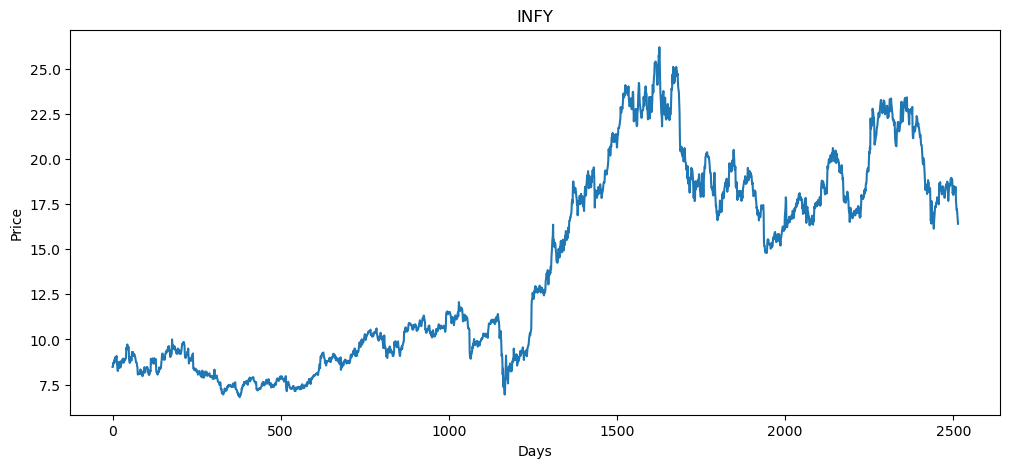

In [13]:
plt.figure(figsize=(12, 5));
plt.plot(df['Close']);
plt.title(ticker);
plt.xlabel('Days');
plt.ylabel('Price');

# 3. Feature Engineering

In [12]:
#temp_df = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

In [13]:
#temp_df['MA_5'] = temp_df.rolling(5).mean()

In [14]:
#temp_df

In [14]:
df.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,INFY,INFY,INFY,INFY,INFY,INFY
0,2015-08-03,6.514524,8.480,8.565,8.430,8.500,6708600
1,2015-08-04,6.506843,8.470,8.485,8.345,8.395,5603000
2,2015-08-05,6.679693,8.695,8.775,8.625,8.625,8204200
3,2015-08-06,6.648963,8.655,8.725,8.575,8.675,6208400
4,2015-08-07,6.733468,8.765,8.770,8.655,8.655,6726600


### 100 Days Moving-Average

In [15]:
df['MA_100'] = df['Close'].rolling(100).mean()

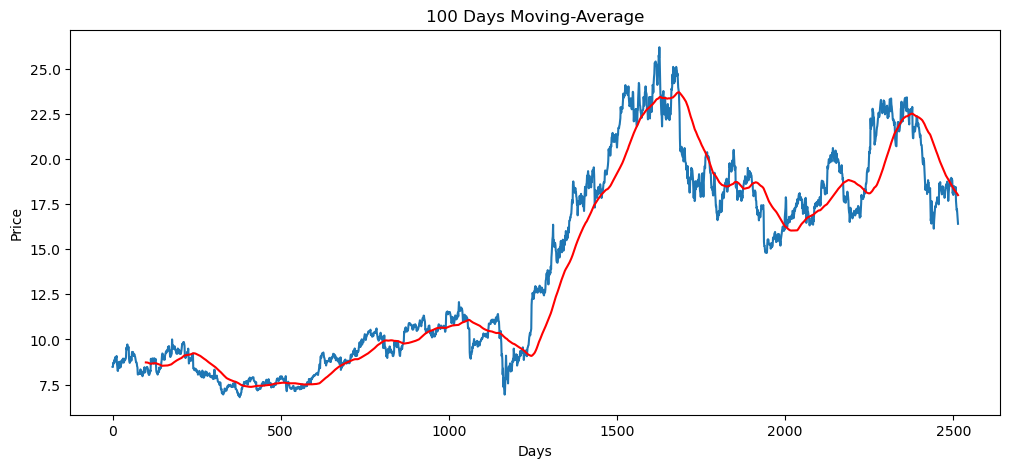

In [16]:
plt.figure(figsize=(12, 5));
plt.plot(df['Close']);
plt.plot(df['MA_100'], 'r');
plt.title('100 Days Moving-Average');
plt.xlabel('Days');
plt.ylabel('Price');

### 200 Days Moving-Average

In [17]:
df['MA_200'] = df['Close'].rolling(200).mean()

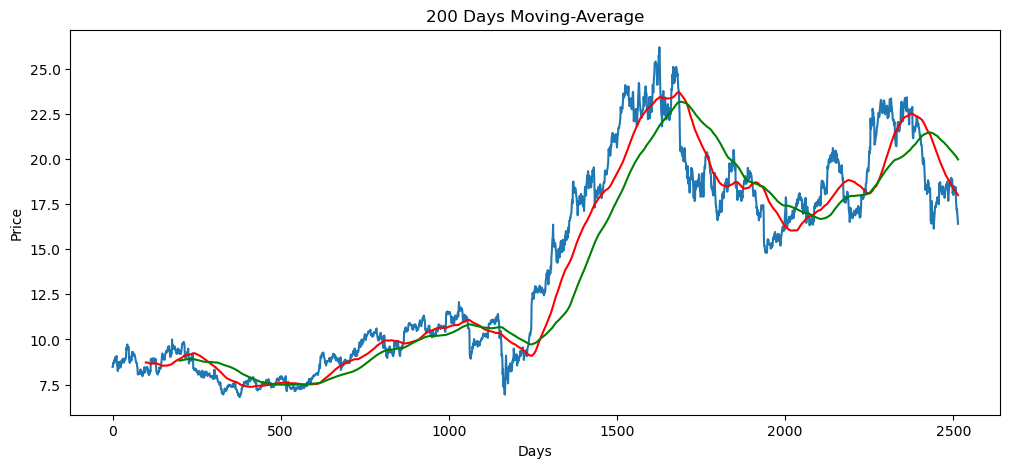

In [18]:
plt.figure(figsize=(12, 5));
plt.plot(df['Close']);
plt.plot(df['MA_100'], 'r')
plt.plot(df['MA_200'], 'g');
plt.title('200 Days Moving-Average');
plt.xlabel('Days');
plt.ylabel('Price');

In [19]:
df['Percentage Change'] = df['Close'].pct_change()
df.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume,MA_100,MA_200,Percentage Change
Ticker,,INFY,INFY,INFY,INFY,INFY,INFY,,,
0,2015-08-03,6.514524,8.480,8.565,8.430,8.500,6708600,NaN,NaN,NaN
1,2015-08-04,6.506843,8.470,8.485,8.345,8.395,5603000,NaN,NaN,-0.001179
2,2015-08-05,6.679693,8.695,8.775,8.625,8.625,8204200,NaN,NaN,0.026564
3,2015-08-06,6.648963,8.655,8.725,8.575,8.675,6208400,NaN,NaN,-0.004600
4,2015-08-07,6.733468,8.765,8.770,8.655,8.655,6726600,NaN,NaN,0.012709


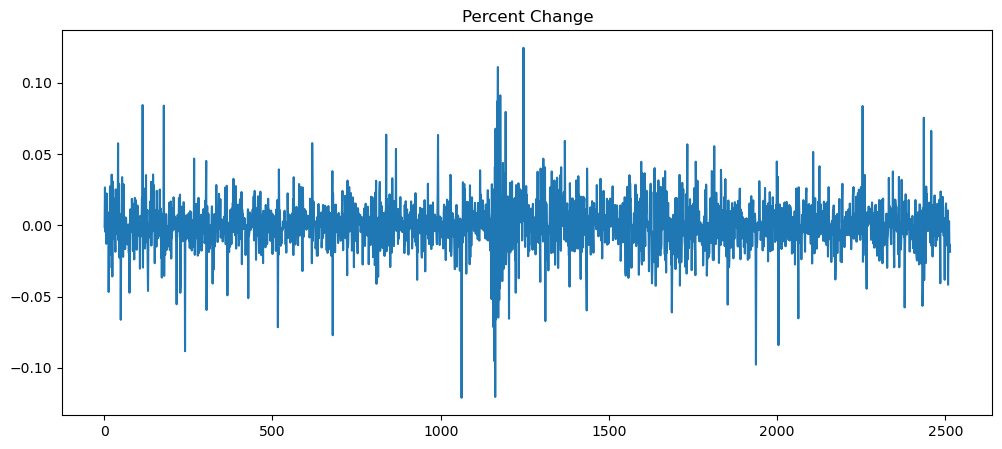

In [20]:
plt.figure(figsize=(12, 5));
plt.plot(df['Percentage Change'])
plt.title('Percent Change');

# 4. Data Preprocessing

In [24]:
df.shape

(2515, 10)

In [25]:
# Splitting data into training and testing datasets.

training_df = pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
testing_df = pd.DataFrame(df['Close'][int(len(df)*0.7):len(df)])
print(training_df)
print(testing_df)

Ticker       INFY
0        8.480000
1        8.470000
2        8.695000
3        8.655000
4        8.765000
...           ...
1755    18.879999
1756    18.559999
1757    17.910000
1758    18.709999
1759    19.150000

[1760 rows x 1 columns]
Ticker       INFY
1760    19.490000
1761    19.620001
1762    19.490000
1763    20.100000
1764    20.150000
...           ...
2510    17.160000
2511    17.209999
2512    16.950001
2513    16.719999
2514    16.410000

[755 rows x 1 columns]


In [27]:
# Scaling down the data between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

data_training_array = scaler.fit_transform(training_df)

# 5. Sequence Creation

In [28]:
# 10 11 13 16 17 14  --- >  22

x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

# 6. Model Building

In [31]:
import tensorflow as tf

/opt/anaconda3/envs/stockvenv/lib/python3.13/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/opt/anaconda3/envs/stockvenv/lib/python3.13/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/opt/anaconda3/envs/stockvenv/lib/python3.13/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. Please update th

In [32]:
print(tf.__version__)

2.20.0-rc0


In [33]:
# ML model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [34]:
model = Sequential()

model.add(Input(shape=(100, 1)))
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

# 7. Model Training

In [35]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0130
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 8.6097e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 8.0280e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 7.7870e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 7.4102e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 7.0275e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 6.2887e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 6.5173e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 6.1761e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 5.8367e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 6.2691e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 6.8487e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 5.4836e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 4.8303e-04
Epoch 15/50
52/52 ━

In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [37]:
# Save the trained model
model.save('stock_prediction_model.keras')

# 8. Preparing Test Data

In [38]:
past_100_days = training_df.tail(100)

In [39]:
past_100_days

Ticker,INFY
1660,22.580000
1661,23.330000
1662,23.900000
1663,23.840000
1664,24.010000
...,...
1755,18.879999
1756,18.559999
1757,17.910000
1758,18.709999


In [40]:
final_df = pd.concat([past_100_days, testing_df], ignore_index=True)

In [41]:
final_df

Ticker,INFY
0,22.580000
1,23.330000
2,23.900000
3,23.840000
4,24.010000
...,...
850,17.160000
851,17.209999
852,16.950001
853,16.719999


In [42]:
input_data = scaler.fit_transform(final_df)

In [43]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

# 9. Making Predictions

In [44]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


In [45]:
y_predicted = scaler.inverse_transform(y_predicted)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

In [46]:
y_predicted = pd.DataFrame(y_predicted)
y_test = pd.DataFrame(y_test)

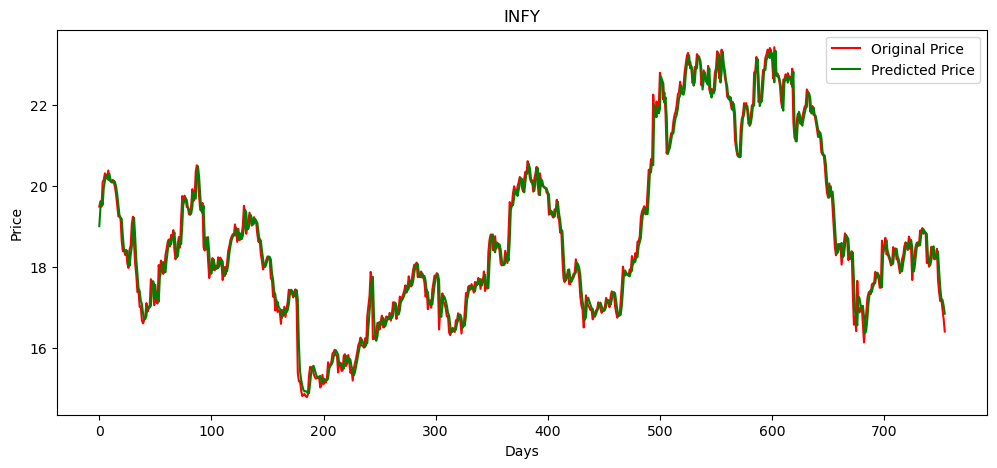

In [47]:
plt.figure(figsize=(12, 5));
plt.plot(y_test, 'r', label='Original Price');
plt.plot(y_predicted, 'g', label='Predicted Price');
plt.title(ticker);
plt.xlabel('Days');
plt.ylabel('Price');
plt.legend();

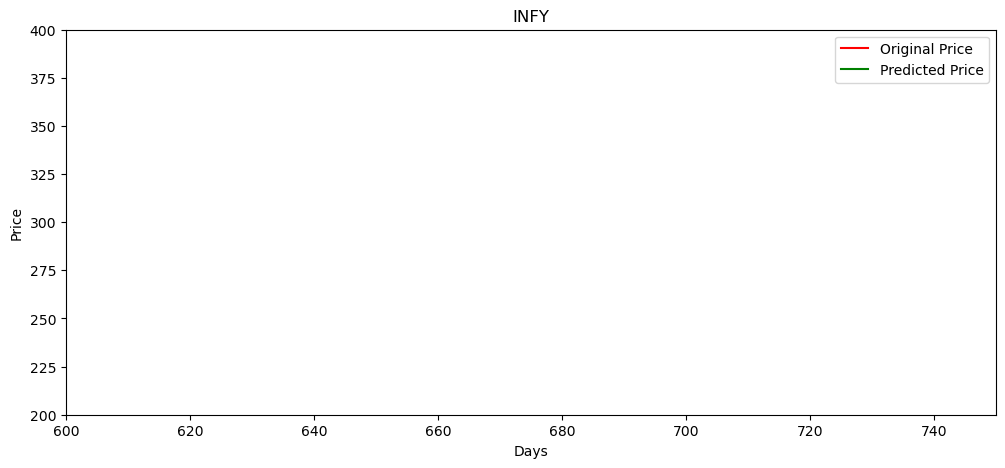

In [49]:
plt.figure(figsize=(12, 5));
plt.plot(y_test, 'r', label='Original Price');
plt.plot(y_predicted, 'g', label='Predicted Price');
plt.title(ticker);
plt.xlabel('Days');
plt.ylabel('Price');
plt.legend();
plt.xlim(600, 750);
plt.ylim(200, 400);

# Model Evaluation

In [50]:
# Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error, r2_score

In [51]:
mse = mean_squared_error(y_test, y_predicted)
mse

0.09494071942686629

In [52]:
# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
rmse

np.float64(0.30812451935356633)

In [53]:
# R-Squared
r2 = r2_score(y_test, y_predicted)
r2

0.9790421170109113